In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [23]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
cols = ["Id","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type"]
df = pd.read_csv(url, header=None, names=cols)

In [24]:
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [25]:
df.shape

(214, 11)

In [26]:
df.isnull().sum()

Id      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [27]:
df = df.drop(columns=["Id"])

In [28]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [29]:
X = df.drop(columns=["Type"])
y = df["Type"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [31]:
rf = RandomForestClassifier(n_estimators=300, random_state=42, class_weight="balanced_subsample")
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [32]:
print('Accuracy: ', accuracy_score(y_test, rf_pred))

Accuracy:  0.813953488372093


In [33]:
print('Confusion Matrix: ', confusion_matrix(y_test,rf_pred))

Confusion Matrix:  [[12  2  0  0  0  0]
 [ 3 11  0  0  1  0]
 [ 1  0  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  1  0  0  0  5]]


In [34]:
print('Classification Report: ',classification_report(y_test,rf_pred))

Classification Report:                precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       0.79      0.73      0.76        15
           3       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.81        43
   macro avg       0.87      0.85      0.84        43
weighted avg       0.83      0.81      0.81        43



In [35]:
svm_clf = Pipeline([("scaler", StandardScaler()),("svc", SVC(kernel="rbf", C=10, gamma="scale"))])
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)

In [36]:
print('Accuracy: ', accuracy_score(y_test, svm_pred))

Accuracy:  0.7209302325581395


In [37]:
print('Confusion Matrix: ', confusion_matrix(y_test,svm_pred))

Confusion Matrix:  [[10  3  1  0  0  0]
 [ 4 10  0  0  1  0]
 [ 1  1  1  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  1  1]
 [ 0  0  0  0  0  6]]


In [38]:
print('Classification Report: ',classification_report(y_test,svm_pred))

Classification Report:                precision    recall  f1-score   support

           1       0.67      0.71      0.69        14
           2       0.71      0.67      0.69        15
           3       0.50      0.33      0.40         3
           5       1.00      1.00      1.00         3
           6       0.50      0.50      0.50         2
           7       0.86      1.00      0.92         6

    accuracy                           0.72        43
   macro avg       0.71      0.70      0.70        43
weighted avg       0.71      0.72      0.71        43



In [39]:
scores  = cross_val_score(rf,X_train,y_train,cv=10,scoring='accuracy')
for i in range(len(scores)):
    print("Fold",i+1,":",scores[i])
print("Maximum Accuracy of Random Forest: ", max(scores))

c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


Fold 1 : 0.7222222222222222
Fold 2 : 0.7058823529411765
Fold 3 : 0.7058823529411765
Fold 4 : 0.7058823529411765
Fold 5 : 0.9411764705882353
Fold 6 : 0.8235294117647058
Fold 7 : 0.8235294117647058
Fold 8 : 0.8235294117647058
Fold 9 : 0.6470588235294118
Fold 10 : 0.8235294117647058
Maximum Accuracy of Random Forest:  0.9411764705882353


In [40]:
scores  = cross_val_score(svm_clf,X_train,y_train,cv=10,scoring='accuracy')
for i in range(len(scores)):
    print("Fold",i+1,":",scores[i])
print("Maximum Accuracy of SVM: ", max(scores))

c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


Fold 1 : 0.5555555555555556
Fold 2 : 0.7647058823529411
Fold 3 : 0.5882352941176471
Fold 4 : 0.6470588235294118
Fold 5 : 0.6470588235294118
Fold 6 : 0.6470588235294118
Fold 7 : 0.7647058823529411
Fold 8 : 0.7647058823529411
Fold 9 : 0.6470588235294118
Fold 10 : 0.7647058823529411
Maximum Accuracy of SVM:  0.7647058823529411


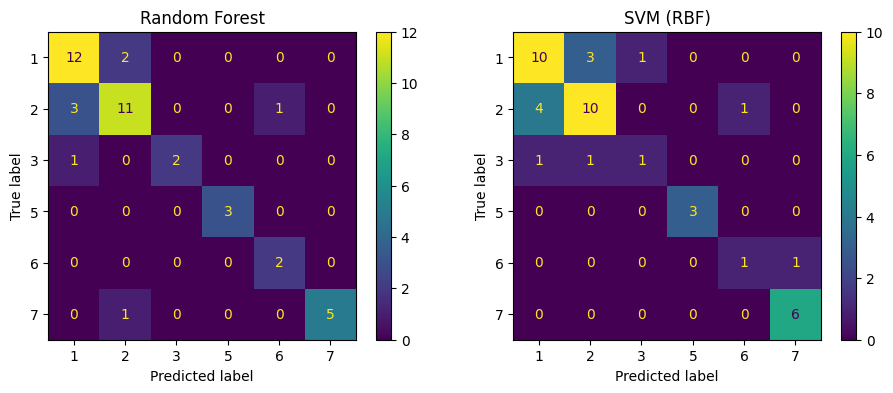

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(11, 4))
ConfusionMatrixDisplay.from_predictions(y_test, rf_pred, ax=axes[0])
axes[0].set_title("Random Forest")
ConfusionMatrixDisplay.from_predictions(y_test, svm_pred, ax=axes[1])
axes[1].set_title("SVM (RBF)")
plt.plot()
plt.show()